In [7]:
import os
import json

import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import dotenv

dotenv.load_dotenv(override=True)

ROOT = os.getenv("ROOT")

## Size of dataset

In [2]:
dataset_keys = ("train", "val", "test")
dataset_sizes = dict()
for dataset in dataset_keys:
    with open(f"data/splits/{dataset}.txt") as f:
        size = len(f.readlines())
        dataset_sizes[dataset] = size

print(f"total size: {sum(dataset_sizes.values())}")
print(dataset_sizes)

total size: 52453
{'train': 36589, 'val': 5320, 'test': 10544}


## Labels

In [3]:
labels = dict()
for fname in tqdm(list(os.listdir(os.path.join("data", "annotations")))):
    with open(os.path.join("data", "annotations", fname), "r") as fid:
        anno = json.load(fid)
        for obj in anno["objects"]:
            label = obj["label"]
            if label in labels:
                labels[label] += 1
            else:
                labels[label] = 1

100%|██████████| 41909/41909 [00:04<00:00, 9997.50it/s] 


In [4]:
print(f"total number of signs: {sum(labels.values())}")
print(f"number of unique labels: {len(labels)}")

total number of signs: 206386
number of unique labels: 401


### Distribution

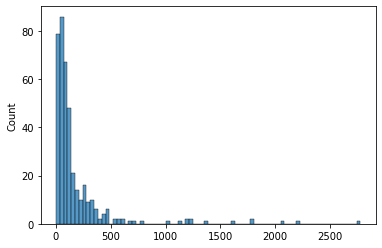

In [5]:
sorted_labels = sorted(labels.items(), key=lambda x: -x[1])
sns.histplot(x=dict(sorted_labels[1:]).values())
plt.show()

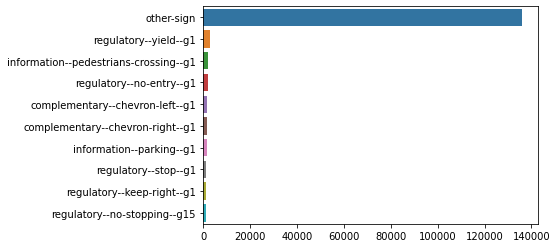

In [6]:
def make_plot(sorted_labels):
    y, x = list(zip(*sorted_labels))
    sns.barplot(x=list(x), y=list(y))
    plt.show()


make_plot(sorted_labels[:10])

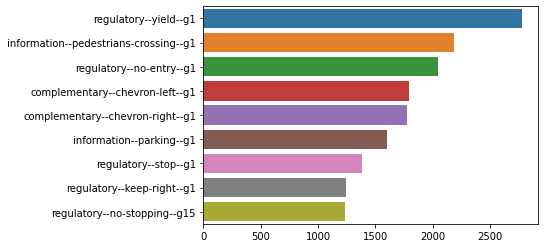

In [7]:
make_plot(sorted_labels[1:10])

how many labels occur more than 100 times

In [8]:
np.sum(np.array(list(labels.values())) > 100)

177

In [9]:
heights = []
widths = []
for fname in tqdm(list(os.listdir(os.path.join(ROOT, "data", "MTSD", "annotations")))):
    with open(os.path.join(ROOT, "data", "MTSD", "annotations", fname), "r") as fid:
        anno = json.load(fid)
        heights.append(anno['height'])
        widths.append(anno['width'])

100%|██████████| 41909/41909 [00:04<00:00, 8423.34it/s]


In [11]:
(max(heights), min(heights)), (max(widths), min(widths))

((6654, 240), (22062, 320))

In [19]:
for fname in os.listdir(os.path.join(ROOT, "data", "MTSD", "annotations")):
    with open(os.path.join(ROOT, "data", "MTSD", "annotations", fname), "r") as fid:
        anno = json.load(fid)
        if anno['height'] < 350:
            print(fname)

1Bjp_0HQAFULWiMKBozaWA.json
AFPom_IjcD0dwuSE6c2GJQ.json
iyvgsYjQp8bpqWeIdAihLQ.json
xxHh0r8AqBy6XZAvuuFrzg.json


In [ ]:
# with hydra.initialize(config_path="conf"):
#     cfg = hydra.compose(config_name="config.yaml")
#     data = MtsdDataModule(cfg=cfg)